In [3]:
data_dir = "cave/paper/"

import glob
paper_files = glob.glob(data_dir + "*.json")

In [5]:
# load all papers according to their tags
from src.paper import Paper 
papers = [Paper.load(f) for f in paper_files]



In [8]:
paper = papers[0]
paper.tags

# I want you to get all tags from all papers, and do a cluster to merge them into max_n tags
# Then we use these max_n tags to analyze trend in AI research across time. 



['generative AI',
 'transfer learning',
 'natural language processing',
 'NLP',
 'transformers',
 'language models',
 'neural networks',
 'BERT',
 'GPT2',
 'computer vision',
 'time series',
 'deep learning',
 'mathematical framework']

In [10]:
paper.date

'2024-01-08'

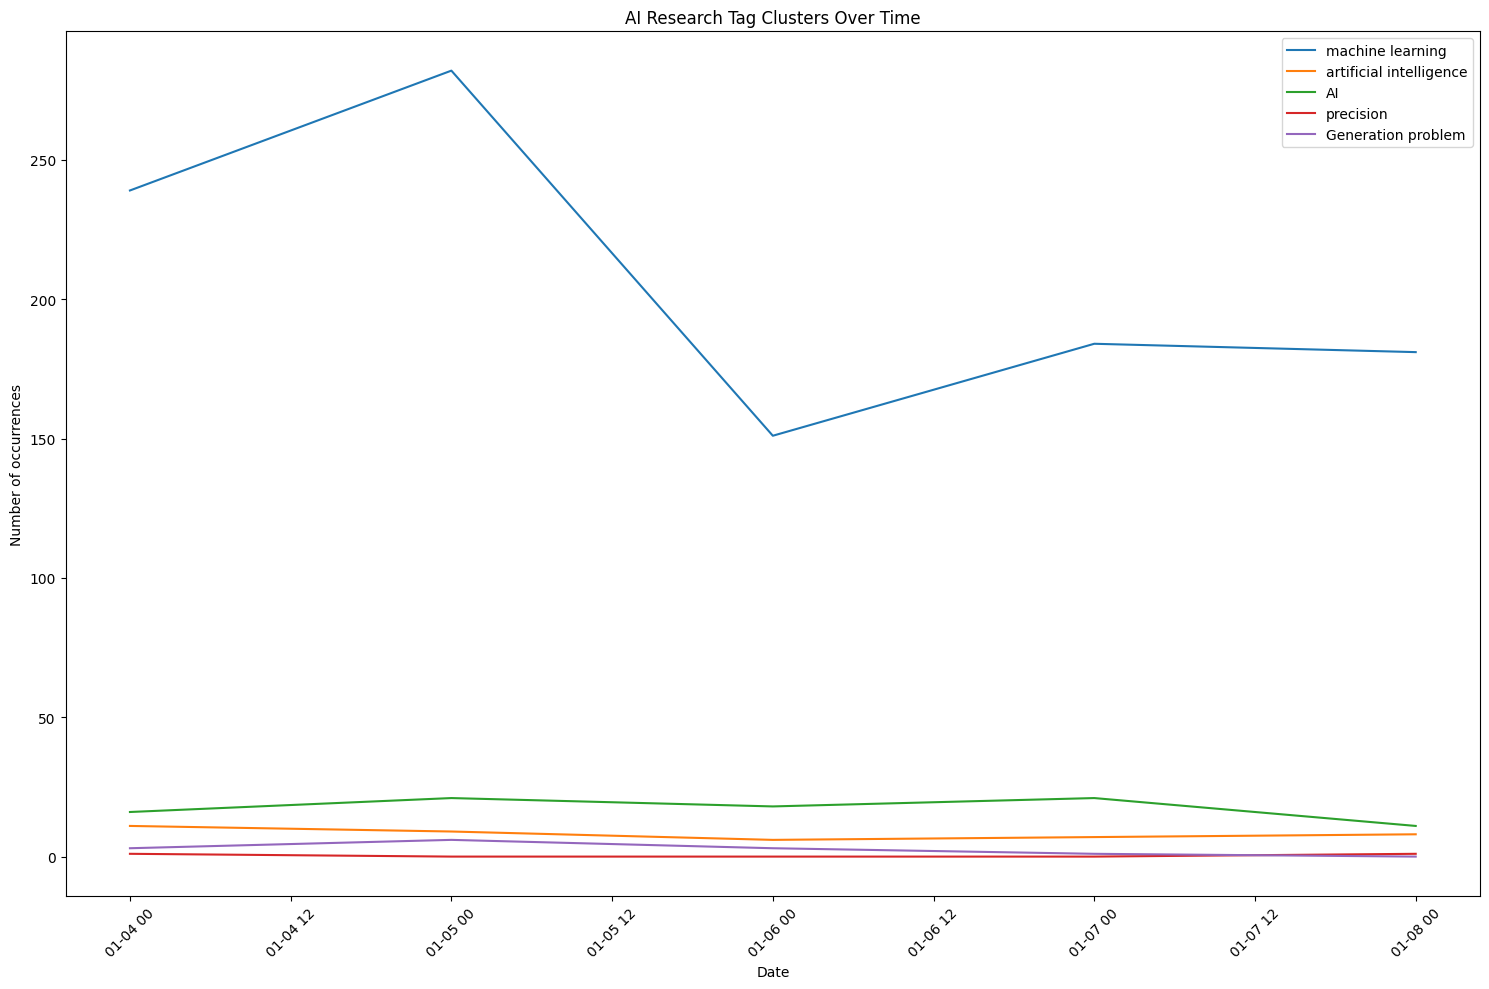

Cluster represented by 'machine learning':
  machine learning: 39
  deep learning: 13
  computer vision: 12
  natural language processing: 8
  neural networks: 6

Cluster represented by 'artificial intelligence':
  artificial intelligence: 29
  Artificial Intelligence: 6
  generative artificial intelligence: 2
  artificial general intelligence: 1
  medical artificial intelligence: 1

Cluster represented by 'AI':
  AI: 15
  generative AI: 14
  Generative AI: 3
  AI security: 2
  human-centered AI: 2

Cluster represented by 'precision':
  precision: 1
  Precision: 1

Cluster represented by 'Generation problem':
  Generation problem: 1
  parameter generation: 1
  3d scenes: 1
  Analogy Generation: 1
  Plan Generation: 1



In [16]:
# Get all tags from all papers
all_tags = [tag for paper in papers for tag in paper.tags]

# Perform clustering on tags
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
from datetime import datetime

# Convert tags to TF-IDF vectors
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(all_tags)

# Cluster tags
max_n = 5  # Adjust this value as needed
kmeans = KMeans(n_clusters=max_n, random_state=42)
kmeans.fit(X)

# Get cluster centers and assign tags to clusters
cluster_centers = kmeans.cluster_centers_
clustered_tags = {}
for i, tag in enumerate(all_tags):
    cluster = kmeans.labels_[i]
    if cluster not in clustered_tags:
        clustered_tags[cluster] = []
    clustered_tags[cluster].append(tag)

# Find the most common tag for each cluster to represent it
cluster_representatives = {}
for cluster, tags in clustered_tags.items():
    tag_counts = defaultdict(int)
    for tag in tags:
        tag_counts[tag] += 1
    cluster_representatives[cluster] = max(tag_counts, key=tag_counts.get)

# Analyze trends over time
tag_trends = defaultdict(lambda: defaultdict(int))

for paper in papers:
    date = datetime.strptime(paper.date, "%Y-%m-%d")
    for tag in paper.tags:
        cluster = kmeans.predict(vectorizer.transform([tag]))[0]
        tag_trends[date][cluster] += 1

# Sort dates and get unique clusters
sorted_dates = sorted(tag_trends.keys())
unique_clusters = sorted(set(cluster for trends in tag_trends.values() for cluster in trends))

# Prepare data for plotting
cluster_data = {cluster: [tag_trends[date].get(cluster, 0) for date in sorted_dates] for cluster in unique_clusters}

# Plot trends
plt.figure(figsize=(15, 10))
for cluster, counts in cluster_data.items():
    plt.plot(sorted_dates, counts, label=cluster_representatives[cluster])

plt.xlabel('Date')
plt.ylabel('Number of occurrences')
plt.title('AI Research Tag Clusters Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print the most common tags in each cluster
for cluster in unique_clusters:
    print(f"Cluster represented by '{cluster_representatives[cluster]}':")
    cluster_tags = clustered_tags[cluster]
    tag_counts = defaultdict(int)
    for tag in cluster_tags:
        tag_counts[tag] += 1
    sorted_tags = sorted(tag_counts.items(), key=lambda x: x[1], reverse=True)
    for tag, count in sorted_tags[:5]:  # Print top 5 tags in each cluster
        print(f"  {tag}: {count}")
    print()

In [13]:
cluster_tags

['biomedical research',
 'operations research',
 'research',
 'research',
 'scientific research',
 'research and development',
 'research discovery',
 'research articles',
 'survey research',
 'academic research',
 'multidisciplinary research',
 'social-cognitive research',
 'scientific research',
 'research dynamics',
 'research priority',
 'research directions']